<a href="https://colab.research.google.com/github/Bgail-ranu/Codveda_Technologies/blob/main/Level2_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load and Inspect Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier

from sklearn.metrics import(
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Churn_data.csv')
df.head()

Mounted at /content/drive


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [ ]:
df.shape

(667, 20)

In [ ]:
df.isna().sum()

,0
State,0
Account length,0
Area code,0
International plan,0
Voice mail plan,0
Number vmail messages,0
Total day minutes,0
Total day calls,0
Total day charge,0
Total eve minutes,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['State'].value_counts()

,count
State,
AZ,19
WA,18
NM,18
NJ,18
WV,18
KS,18
ND,18
WI,17
ID,17


In [ ]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,102.841079,436.157421,8.407796,180.948126,100.937031,30.761769,203.355322,100.476762,17.285262,199.685307,100.113943,8.985907,10.238381,4.527736,2.764948,1.563718
std,40.819480,41.783305,13.994480,55.508628,20.396790,9.436463,49.719268,18.948262,4.226160,49.759931,20.172505,2.239429,2.807850,2.482442,0.758167,1.333357
min,1.000000,408.000000,0.000000,25.900000,30.000000,4.400000,48.100000,37.000000,4.090000,23.200000,42.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,76.000000,408.000000,0.000000,146.250000,87.500000,24.860000,171.050000,88.000000,14.540000,167.950000,86.000000,7.560000,8.600000,3.000000,2.320000,1.000000
50%,102.000000,415.000000,0.000000,178.300000,101.000000,30.310000,203.700000,101.000000,17.310000,201.600000,100.000000,9.070000,10.500000,4.000000,2.840000,1.000000
75%,128.000000,415.000000,20.000000,220.700000,115.000000,37.520000,236.450000,113.000000,20.095000,231.500000,113.500000,10.420000,12.050000,6.000000,3.255000,2.000000
max,232.000000,510.000000,51.000000,334.300000,165.000000,56.830000,361.800000,168.000000,30.750000,367.700000,175.000000,16.550000,18.300000,18.000000,4.940000,8.000000


In [ ]:
df['Churn'].value_counts(normalize=True)

,proportion
Churn,
False,0.857571
True,0.142429


## **Data Visualization**

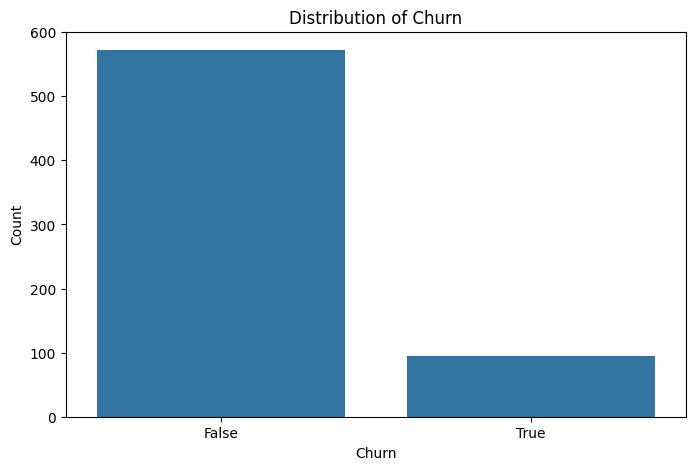

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Churn')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [ ]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

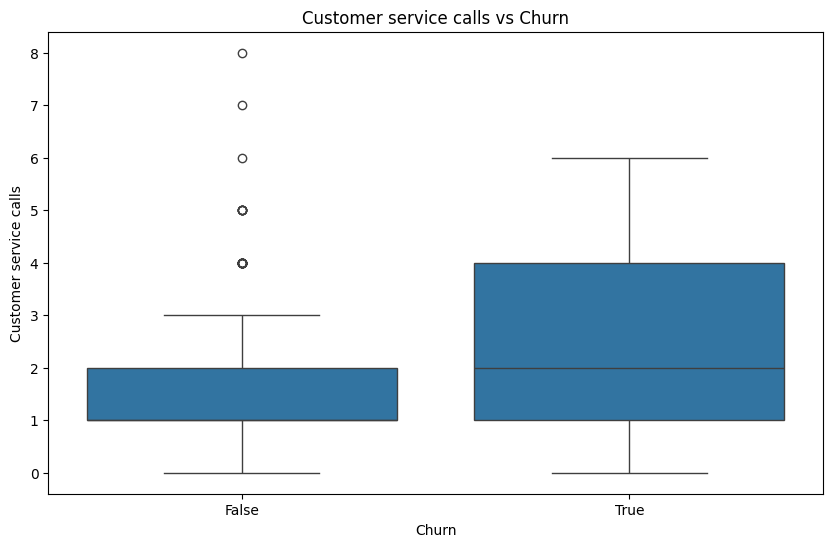

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn', y='Customer service calls')
plt.title('Customer service calls vs Churn')
plt.xlabel('Churn')
plt.ylabel('Customer service calls')
plt.show()

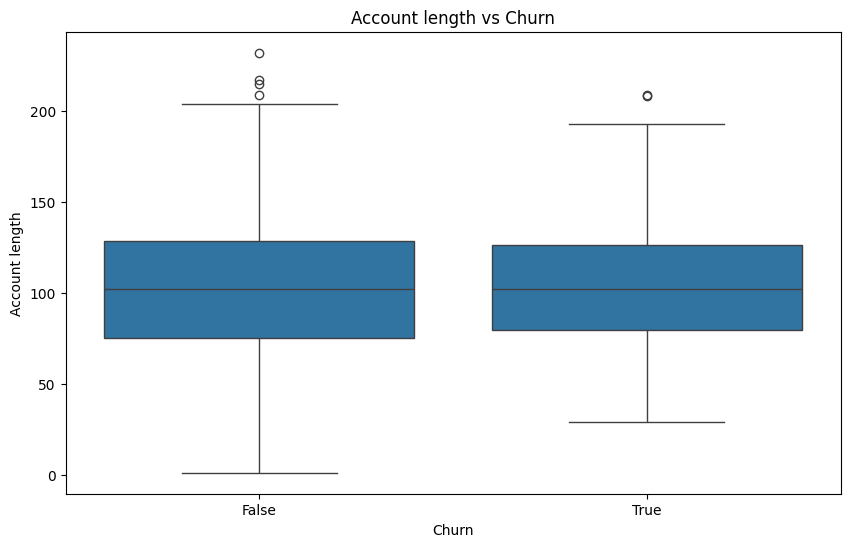

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn', y='Account length')
plt.title('Account length vs Churn')
plt.show()

In [ ]:
print("\nCorrelation with Churn:")

# First, convert boolean to numeric for correlation
df['Churn_numeric'] = df['Churn'].astype(int)
correlations = df[['Account length', 'Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge', 'Customer service calls']].corrwith(df['Churn_numeric'])
print(correlations.sort_values(ascending=False))


Correlation with Churn:
Total day charge          0.242777
Customer service calls    0.233259
Total eve charge          0.175616
Total night charge        0.042958
Account length            0.012315
Total intl charge        -0.003681
dtype: float64


In [ ]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn', 'Churn_numeric'],
      dtype='object')

In [ ]:
df = df.drop(columns= ['State', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total eve minutes',
       'Total eve calls', 'Total night minutes',
       'Total night calls', 'Total intl minutes',
       'Total intl calls'])
df

,Account length,Total day charge,Total eve charge,Total night charge,Total intl charge,Customer service calls,Churn,Churn_numeric
0,117,31.37,29.89,9.71,2.35,1,False,0
1,65,21.95,19.42,9.40,3.43,4,True,1
2,161,56.59,27.01,7.23,1.46,4,True,1
3,111,18.77,11.67,8.53,2.08,2,False,0
4,49,20.28,18.28,8.04,3.00,1,False,0
...,...,...,...,...,...,...,...,...
662,114,23.31,13.23,11.14,3.11,2,False,0
663,106,14.21,17.33,10.33,2.19,1,False,0
664,60,32.96,7.23,9.45,3.56,3,False,0
665,159,28.87,16.80,8.72,3.13,1,False,0


In [ ]:
df.to_csv('Churn_cleaned.csv', index=False)

In [ ]:
gdrive_path = '/content/drive/MyDrive/Churn_cleaned.csv'

df.to_csv(gdrive_path, index=False)

print(f"A new permanent file has been saved to: {gdrive_path}")

A new permanent file has been saved to: /content/drive/MyDrive/Churn_cleaned.csv


## **Separate x and y**

In [ ]:
y = df['Churn'].astype(int)
x = df.drop(['Churn', 'Churn_numeric'], axis=1)

print(f"Features shape: {x.shape}")
print(f"Target shape: {y.shape}")
y

Features shape: (667, 6)
Target shape: (667,)


,Churn
0,0
1,1
2,1
3,0
4,0
...,...
662,0
663,0
664,0
665,0


In [ ]:
x

,Account length,Total day charge,Total eve charge,Total night charge,Total intl charge,Customer service calls
0,117,31.37,29.89,9.71,2.35,1
1,65,21.95,19.42,9.40,3.43,4
2,161,56.59,27.01,7.23,1.46,4
3,111,18.77,11.67,8.53,2.08,2
4,49,20.28,18.28,8.04,3.00,1
...,...,...,...,...,...,...
662,114,23.31,13.23,11.14,3.11,2
663,106,14.21,17.33,10.33,2.19,1
664,60,32.96,7.23,9.45,3.56,3
665,159,28.87,16.80,8.72,3.13,1


In [ ]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
Account length,667.0,102.841079,40.819480,1.00,76.00,102.00,128.000,232.00
Total day charge,667.0,30.761769,9.436463,4.40,24.86,30.31,37.520,56.83
Total eve charge,667.0,17.285262,4.226160,4.09,14.54,17.31,20.095,30.75
Total night charge,667.0,8.985907,2.239429,1.04,7.56,9.07,10.420,16.55
Total intl charge,667.0,2.764948,0.758167,0.00,2.32,2.84,3.255,4.94
Customer service calls,667.0,1.563718,1.333357,0.00,1.00,1.00,2.000,8.00


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42,
    stratify=y)
print(f"Training set: {x_train.shape}")
print(f"Test set: {x_test.shape}")

Training set: (533, 6)
Test set: (134, 6)


In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

print("Features scaled successfully!")
print(f"Example - Before scaling: {x_train.iloc[0]['Account length']}")
print(f"Example - After scaling: {x_train_scaled[0][0]:.2f}")


Features scaled successfully!
Example - Before scaling: 178.0
Example - After scaling: 1.84


# **Model building**

In [ ]:
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(x_train_scaled, y_train)
print("Logistic Regression trained!")

# Make predictions
y_pred_log = log_reg.predict(x_test_scaled)
print("Predictions made!")

Logistic Regression trained!
Predictions made!


In [ ]:
def evaluate_model(model_name, y_test, y_pred):


    # Calculate all metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print metrics
    print(f"Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
    print(f"Recall:    {recall:.4f} ({recall*100:.2f}%)")
    print(f"F1-Score:  {f1:.4f} ({f1*100:.2f}%)")

    '''print(f"\n{'-'*70}")
    print("WHAT THESE NUMBERS MEAN:")
    print(f"{'-'*70}")
    print(f"✓ Model got {accuracy*100:.2f}% of predictions correct")
    print(f"✓ Of churned accounts, {precision*100:.2f}% were actually good")
    print(f"✓ Of non churned, we approved {recall*100:.2f}% of them")
    print(f"✓ F1-Score balances precision and recall: {f1*100:.2f}%")'''

    # Confusion Matrix
    print(f"\n{'-'*70}")
    print("CONFUSION MATRIX:")
    print(f"{'-'*70}")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    '''print(f"\nBreakdown:")
    print(f"  True Negatives (Correctly Rejected):  {cm[0][0]}")
    print(f"  False Positives (Wrongly Approved):   {cm[0][1]} ⚠️")
    print(f"  False Negatives (Wrongly Rejected):   {cm[1][0]} ⚠️")
    print(f"  True Positives (Correctly Approved):  {cm[1][1]}")'''

    # Classification Report
    print(f"\n{'-'*70}")
    print("DETAILED CLASSIFICATION REPORT:")
    print(f"{'-'*70}")
    print(classification_report(y_test, y_pred, target_names=['Rejected', 'Approved']))

    # Return metrics as dictionary
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

In [ ]:
log_reg_results = evaluate_model("Logistic Regression", y_test, y_pred_log)


Accuracy:  0.8507 (85.07%)
Precision: 0.3333 (33.33%)
Recall:    0.0526 (5.26%)
F1-Score:  0.0909 (9.09%)

----------------------------------------------------------------------
CONFUSION MATRIX:
----------------------------------------------------------------------
[[113   2]
 [ 18   1]]

----------------------------------------------------------------------
DETAILED CLASSIFICATION REPORT:
----------------------------------------------------------------------
              precision    recall  f1-score   support

    Rejected       0.86      0.98      0.92       115
    Approved       0.33      0.05      0.09        19

    accuracy                           0.85       134
   macro avg       0.60      0.52      0.50       134
weighted avg       0.79      0.85      0.80       134

